In [1]:
import matplotlib.pyplot as plt
import numpy as np

import torch
import torch.optim as optim
import torch.nn as nn
from torchvision import datasets, transforms
from torchsummary import summary

from model import QuanvNet, ClassicNet

import os
os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"

### Load and process data

In [2]:
## TODO: Add data loading 
# Concentrating on the first 100 samples
n_samples = 100

X_train = datasets.MNIST(root='./data', train=True, download=True,
                         transform=transforms.Compose([transforms.ToTensor()]))

# Leaving only labels 0 and 1 
idx = np.append(np.where(X_train.targets == 0)[0][:n_samples], 
                np.where(X_train.targets == 1)[0][:n_samples])

X_train.data = X_train.data[idx]
X_train.targets = X_train.targets[idx]

train_loader = torch.utils.data.DataLoader(X_train, batch_size=1, shuffle=True)

n_samples = 50

X_test = datasets.MNIST(root='./data', train=False, download=True,
                        transform=transforms.Compose([transforms.ToTensor()]))

idx = np.append(np.where(X_test.targets == 0)[0][:n_samples], 
                np.where(X_test.targets == 1)[0][:n_samples])

X_test.data = X_test.data[idx]
X_test.targets = X_test.targets[idx]

test_loader = torch.utils.data.DataLoader(X_test, batch_size=1, shuffle=True)


### Define model and training parameters

In [11]:
# Model trianing
model = QuanvNet()
optimizer = optim.Adam(model.parameters(), lr=0.001)
loss_func = nn.CrossEntropyLoss()
epochs = 20

### Train

In [ ]:
loss_list = []

model.train()
for epoch in range(epochs):
    total_loss = []
    for batch_idx, (data, target) in enumerate(train_loader):
        optimizer.zero_grad()
        # Forward pass
        output = model(data)

        # Calculating loss
        loss = loss_func(output, target)
        
        # Backward pass
        loss.backward()
        
        # Optimize the weights
        optimizer.step()
        
        total_loss.append(loss.item())

    loss_list.append(sum(total_loss)/len(total_loss))
    print('Training [{:.0f}%]\tLoss: {:.4f}'.format(
        100. * (epoch + 1) / epochs, loss_list[-1]))

### Analyze results

Text(0, 0.5, 'Cross Entropy Loss')

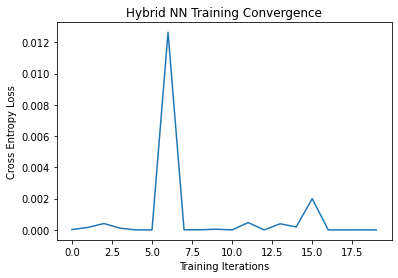

In [7]:
## TODO: visualize results and training
plt.plot(loss_list)
plt.title('Hybrid NN Training Convergence')
plt.xlabel('Training Iterations')
plt.ylabel('Cross Entropy Loss')

In [10]:
preds = []
with torch.no_grad():
    for batch_dix, (val, target) in enumerate(test_loader):
        y_hat = model.forward(val)
        preds.append([y_hat.argmax().item(), target.item()])
print(preds)

[[0, 0], [0, 0], [0, 0], [0, 0], [1, 1], [1, 1], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [1, 1], [1, 1], [1, 1], [0, 0], [0, 0], [1, 1], [0, 0], [1, 1], [1, 1], [0, 0], [0, 0], [1, 1], [0, 0], [0, 0], [0, 0], [1, 1], [1, 1], [1, 1], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [1, 1], [0, 0], [1, 1], [1, 1], [1, 1], [0, 0], [0, 0], [1, 1], [1, 1], [1, 1], [1, 1], [0, 0], [0, 0], [1, 1], [0, 0], [0, 0], [0, 0], [1, 1], [1, 1], [0, 0], [0, 0], [0, 0], [1, 1], [1, 1], [0, 0], [1, 1], [1, 1], [1, 1], [1, 1], [0, 0], [0, 0], [1, 1], [0, 0], [1, 1], [1, 1], [1, 1], [1, 1], [0, 0], [1, 1], [1, 1], [0, 0], [1, 1], [1, 1], [0, 0], [0, 0], [0, 0], [1, 1], [0, 0], [1, 1], [0, 0], [1, 1], [1, 1], [1, 1], [0, 0], [1, 1], [1, 1], [1, 1], [1, 1], [0, 0], [1, 1], [0, 0], [1, 1], [0, 0], [1, 1]]
